# Desafio Codenation: Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

* matemática: 3
* ciências da natureza: 2
* linguagens e códigos: 1.5
* ciências humanas: 1
* redação: 3

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

Faça o upload do arquivo answer.csv usando o botão “Submeter resposta”.

## Load libs

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Load dataset

In [2]:
traindf = pd.read_csv('train.csv', index_col=0)
traindf.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [3]:
traindf['NU_NOTA_MT'].head()

1    399.4
2    459.8
3      NaN
4      NaN
5      NaN
Name: NU_NOTA_MT, dtype: float64

In [4]:
traindf.shape

(13730, 166)

In [5]:
traindf.describe()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,13730.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,1.782666,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,0.880734,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,1.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
testdf = pd.read_csv('test.csv')
testdf.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [8]:
testdf.shape

(4576, 47)

In [9]:
testdf.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,1480.000000,4576.000000,1480.000000,...,3442.000000,3377.000000,4576.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000
mean,30.762019,21.542395,2.181163,1.060970,1.791084,2.119537,1.368663,1.182432,0.127404,2.264865,...,529.195264,514.304205,0.604458,1.095943,119.626888,111.915902,106.384365,112.881256,76.683447,527.491857
std,9.912313,6.854073,1.017531,0.281289,0.875692,3.210353,0.568589,0.572495,0.333461,0.716922,...,73.086665,67.725564,0.489020,0.695047,29.028146,33.296849,33.834492,33.202244,42.985637,151.979490
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,479.725000,468.400000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,532.000000,516.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,540.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,579.550000,562.400000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,65.000000,5.000000,4.000000,4.000000,10.000000,3.000000,3.000000,1.000000,4.000000,...,773.600000,708.900000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


In [10]:
answerdf = pd.DataFrame()

## Data analysis

In [11]:
answerdf['NU_INSCRICAO'] = testdf['NU_INSCRICAO']
answerdf.head()

,NU_INSCRICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,b38a03232f43b11c9d0788abaf060f7366053b6d
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d
4,715494628a50142ce8cb17191cfe6d0f3cae0934


In [12]:
answerdf.shape

(4576, 1)

### First hypothesis of features

Foi percebido que as features NU_IDADE e IN_TREINEIRO possui uma baixa correlação com as outras features

In [13]:
var = ['NU_IDADE','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']

In [14]:
traindf[var].corr()

,NU_IDADE,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_IDADE,1.000000,-0.295091,-0.056171,-0.001611,-0.024979,-0.116125
IN_TREINEIRO,-0.295091,1.000000,-0.037874,-0.053460,-0.028261,-0.026328
NU_NOTA_CN,-0.056171,-0.037874,1.000000,0.609543,0.545667,0.459938
NU_NOTA_CH,-0.001611,-0.053460,0.609543,1.000000,0.692988,0.550582
NU_NOTA_LC,-0.024979,-0.028261,0.545667,0.692988,1.000000,0.512908
NU_NOTA_REDACAO,-0.116125,-0.026328,0.459938,0.550582,0.512908,1.000000


In [15]:
testdf[var].corr()

,NU_IDADE,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_IDADE,1.000000,-0.293714,-0.105278,-0.048229,-0.079171,-0.161202
IN_TREINEIRO,-0.293714,1.000000,-0.009669,-0.032181,-0.004934,-0.014277
NU_NOTA_CN,-0.105278,-0.009669,1.000000,0.598574,0.545801,0.442692
NU_NOTA_CH,-0.048229,-0.032181,0.598574,1.000000,0.679993,0.537141
NU_NOTA_LC,-0.079171,-0.004934,0.545801,0.679993,1.000000,0.495745
NU_NOTA_REDACAO,-0.161202,-0.014277,0.442692,0.537141,0.495745,1.000000


### Second hypothesis of features

As features NU_IDADE e IN_TREINEIRO foram descartadas, pois demonstraram não serem relevantes para a eficiência do modelo

In [16]:
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']

In [17]:
traindf[features].corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.609543,0.545667,0.459938
NU_NOTA_CH,0.609543,1.000000,0.692988,0.550582
NU_NOTA_LC,0.545667,0.692988,1.000000,0.512908
NU_NOTA_REDACAO,0.459938,0.550582,0.512908,1.000000


In [18]:
testdf[features].corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.598574,0.545801,0.442692
NU_NOTA_CH,0.598574,1.000000,0.679993,0.537141
NU_NOTA_LC,0.545801,0.679993,1.000000,0.495745
NU_NOTA_REDACAO,0.442692,0.537141,0.495745,1.000000


Para facilitar a percepção quanto ao nível de correlação entre as features foi gerado um mapa de calor com as mesmas

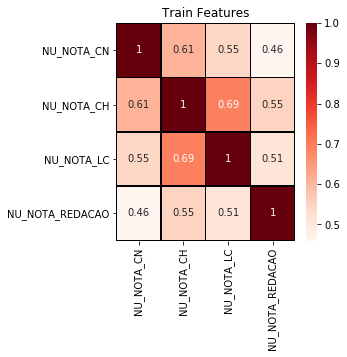

In [19]:
%matplotlib inline

plt.figure(figsize=(4,4))
plt.title('Train Features')
sns.heatmap(traindf[features].corr(), annot=True, linewidths=0.5, linecolor='black', cmap='Reds')
plt.xticks(rotation=90)
plt.show()

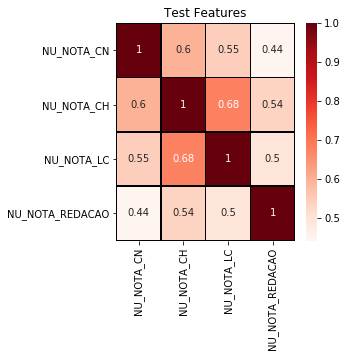

In [20]:
%matplotlib inline

plt.figure(figsize=(4,4))
plt.title('Test Features')
sns.heatmap(testdf[features].corr(), annot=True, linewidths=0.5, linecolor='black', cmap='Reds')
plt.xticks(rotation=90)
plt.show()

## Pré-processamento dos dados

Visto que existem dados nulos no dataset existem duas abordagens que podem ser tomadas: 

1. Excluir os dados nulos do dataset. O que poderia diminuir drasticamente as amostras para treinar o modelo;

2. Substituir os valores nulos por zeros. O que conserva o número de amostras do dataset.

3. Substituir os valores nulos com o valor da média das features. O que conserva o número de amostras do dataset.

A abordagem escolhida será a segunda, visto que a primeira com certeza irá reduzir o potencial do modelo de entender o padrão e visto que a terceira foi testada e não gerou bons resultados.

In [21]:
traindf[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
dtype: int64

In [22]:
traindf['NU_NOTA_MT'].isnull().sum()

3597

In [23]:
testdf[features].isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
dtype: int64

In [24]:
# Preencher valores nulos com o valor 0 - Tratamento das notas de provas corrompidas
traindf['NU_NOTA_CN'].fillna(0, inplace=True)
traindf['NU_NOTA_CH'].fillna(0, inplace=True)
traindf['NU_NOTA_REDACAO'].fillna(0, inplace=True)
traindf['NU_NOTA_LC'].fillna(0, inplace=True)
traindf['NU_NOTA_MT'].fillna(0, inplace=True)
testdf['NU_NOTA_CN'].fillna(0, inplace=True)
testdf['NU_NOTA_CH'].fillna(0, inplace=True)
testdf['NU_NOTA_REDACAO'].fillna(0, inplace=True)
testdf['NU_NOTA_LC'].fillna(0, inplace=True)

In [25]:
traindf[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [26]:
traindf['NU_NOTA_MT'].isnull().sum()

0

In [27]:
testdf[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

## Train Test Split

Nesta etapa os dados serão separados da target feature, ou seja, aquela que se deseja prever, além de serem separados em dois conjuntos, um de treino e outro de teste.

Neste experimento os dados serão separados em uma proporção 80/20, ou seja, 80% das amostras do dataset serão selecionadas para o conjunto de treino e os outros 20% para o conjunto de teste, que será usado para validação do modelo.

### Separação das features do target

In [28]:
X = traindf[features]
X.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
1,436.3,495.4,581.2,520.0
2,474.5,544.1,599.0,580.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0


In [29]:
y = traindf['NU_NOTA_MT']
y.head()

1    399.4
2    459.8
3      0.0
4      0.0
5      0.0
Name: NU_NOTA_MT, dtype: float64

### Separação dos dados em treino e teste

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Normalização e padronização das escalas das features

In [31]:
sc = StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Regression

### Linear regression

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# To retrieve the intercept and retrieving the slope
lr.intercept_, lr.coef_

(355.6452294246177,
 array([ 76.33616388, -30.43308586, 154.11138722,  22.0087486 ]))

In [0]:
y_pred = lr.predict(X_test)
y_pred

array([ -2.92786148, 579.59504078, 426.79647578, ..., 437.85980049,
        -2.92786148, 466.18135561])

In [0]:
y_test

3204      0.0
1671    663.0
1786    466.9
3091    413.2
252     360.8
        ...  
1092    476.6
864     417.3
634     403.2
3021      0.0
3895    344.6
Name: NU_NOTA_MT, Length: 2746, dtype: float64

In [0]:
r2_score(y_test, y_pred)

0.9025184207872168

### Random Forest regression

In [0]:
regr = RandomForestRegressor(max_depth=6, n_estimators=50, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
regr.feature_importances_

array([5.52479947e-02, 1.13564960e-02, 9.32883023e-01, 5.12486282e-04])

In [0]:
y_pred = regr.predict(X_test)
y_pred

array([  0.        , 571.83895196, 440.78239708, ..., 448.37884861,
         0.        , 455.56519117])

In [0]:
r2_score(y_test, y_pred)

0.9231581553743481

In [0]:
y_pred = regr.predict(testdf[features])
y_pred

array([847.02131386, 847.02131386, 847.02131386, ..., 847.02131386,
       847.02131386, 417.48588774])

In [0]:
answerdf['NU_NOTA_MT'] = y_pred
answerdf.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,847.021314
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,847.021314
2,b38a03232f43b11c9d0788abaf060f7366053b6d,847.021314
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,417.485888
4,715494628a50142ce8cb17191cfe6d0f3cae0934,847.021314


In [0]:
testdf.shape, answerdf.shape

((4576, 47), (4576, 2))

In [0]:
answerdf.describe()

,NU_NOTA_MT
count,4576.000000
mean,740.450421
std,184.183308
min,417.485888
25%,807.560558
50%,847.021314
75%,847.021314
max,847.021314


In [0]:
answerdf.to_csv('answer.csv', index=False)

### Random Forest with Grid Search Cross-Validation

In [32]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(3,7),
        'n_estimators': (10, 50, 100, 1000),
    },
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_

rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)

# Perform K-Fold CV
scores = cross_val_score(rfr, X, y, cv=10, scoring='r2')
scores

array([0.92467832, 0.92672244, 0.9181526 , 0.92482444, 0.91553477,
       0.91880284, 0.92710448, 0.92705182, 0.92223266, 0.91706469])

In [33]:
scores.mean() * 100

92.22169062681722

In [34]:
rfr.fit(traindf[features], traindf['NU_NOTA_MT'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=False, verbose=False, warm_start=False)

In [35]:
y_pred = rfr.predict(testdf[features])
y_pred

array([431.95903101, 453.36874319, 598.85470336, ..., 678.7119495 ,
       452.33327693,   0.        ])

In [36]:
answerdf['NU_NOTA_MT'] = y_pred
answerdf.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,431.959031
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,453.368743
2,b38a03232f43b11c9d0788abaf060f7366053b6d,598.854703
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,536.065914


In [37]:
answerdf.describe()

,NU_NOTA_MT
count,4576.000000
mean,355.403283
std,219.232396
min,0.000000
25%,0.000000
50%,444.306180
75%,482.621474
max,849.686242


In [38]:
answerdf.to_csv('answer.csv', index=False, float_format='%.1f')